In [3]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('/Users/yahyaali/Desktop/Diabetes Dataset.csv')
df.head()

# of Preg  Plasma Glucose Conc.  Diastolic BP  Triceps Skinfold Thickness  \
0          6                   148            72                          35   
1          1                    85            66                          29   
2          8                   183            64                           0   
3          1                    89            66                          23   
4          0                   137            40                          35   

   Serum Insulin 2hrs   BMI  Diabetes Pedigree Function  Age  Class  
0                   0  33.6                       0.627   50      1  
1                   0  26.6                       0.351   31      0  
2                   0  23.3                       0.672   32      1  
3                  94  28.1                       0.167   21      0  
4                 168  43.1                       2.288   33      1

In [4]:
df.isnull().sum()

# of Preg                     0
Plasma Glucose Conc.          0
Diastolic BP                  0
Triceps Skinfold Thickness    0
Serum Insulin 2hrs            0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Class                         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   # of Preg                   768 non-null    int64  
 1   Plasma Glucose Conc.        768 non-null    int64  
 2   Diastolic BP                768 non-null    int64  
 3   Triceps Skinfold Thickness  768 non-null    int64  
 4   Serum Insulin 2hrs          768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset = df.values

In [7]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
X = dataset[:,0:8]

In [9]:
Y = dataset[:,8]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [15]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(537, 8) (115, 8) (116, 8) (537,) (115,) (116,)


In [17]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [21]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 847us/step - loss: 0.6846 - accuracy: 0.6574 - val_loss: 0.6824 - val_accuracy: 0.6522
Epoch 2/100
537/537 [==============================] - 0s 183us/step - loss: 0.6781 - accuracy: 0.6611 - val_loss: 0.6773 - val_accuracy: 0.6435
Epoch 3/100
537/537 [==============================] - 0s 158us/step - loss: 0.6728 - accuracy: 0.6611 - val_loss: 0.6733 - val_accuracy: 0.6435
Epoch 4/100
537/537 [==============================] - 0s 129us/step - loss: 0.6687 - accuracy: 0.6611 - val_loss: 0.6701 - val_accuracy: 0.6435
Epoch 5/100
537/537 [==============================] - 0s 114us/step - loss: 0.6653 - accuracy: 0.6611 - val_loss: 0.6676 - val_accuracy: 0.6435
Epoch 6/100
537/537 [==============================] - 0s 138us/step - loss: 0.6626 - accuracy: 0.6611 - val_loss: 0.6656 - val_accuracy: 0.6435
Epoch 7/100
537/537 [==============================] - 0s 134us/step - loss: 0.6604 

In [22]:
model.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 280us/step


0.6034482717514038

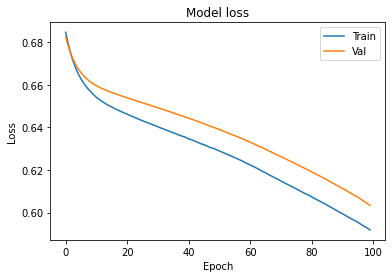

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

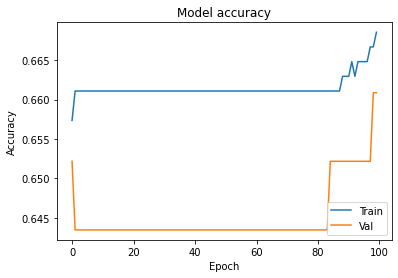

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
model_2 = Sequential([
    Dense(10, activation='relu', input_shape=(8,)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [26]:
model_2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist_2 = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 115us/step - loss: 0.5910 - accuracy: 0.6704 - val_loss: 0.6025 - val_accuracy: 0.6609
Epoch 2/100
537/537 [==============================] - 0s 155us/step - loss: 0.5902 - accuracy: 0.6723 - val_loss: 0.6016 - val_accuracy: 0.6609
Epoch 3/100
537/537 [==============================] - 0s 127us/step - loss: 0.5891 - accuracy: 0.6778 - val_loss: 0.6007 - val_accuracy: 0.6609
Epoch 4/100
537/537 [==============================] - 0s 88us/step - loss: 0.5883 - accuracy: 0.6797 - val_loss: 0.5997 - val_accuracy: 0.6609
Epoch 5/100
537/537 [==============================] - 0s 128us/step - loss: 0.5873 - accuracy: 0.6797 - val_loss: 0.5987 - val_accuracy: 0.6609
Epoch 6/100
537/537 [==============================] - 0s 282us/step - loss: 0.5864 - accuracy: 0.6797 - val_loss: 0.5978 - val_accuracy: 0.6609
Epoch 7/100
537/537 [==============================] - 0s 121us/step - loss: 0.5855 -

In [29]:
model_2.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 627us/step


0.6120689511299133

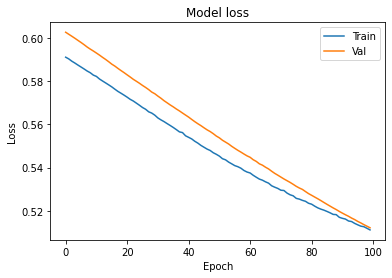

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

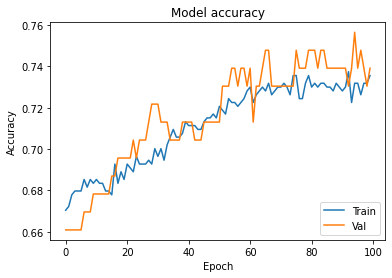

In [31]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
model_3 = Sequential([
    Dense(15, activation='relu', input_shape=(8,)),
    Dense(15, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [34]:
model_3.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_9 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 16        
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


In [36]:
hist_3 = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 137us/step - loss: 0.5110 - accuracy: 0.7318 - val_loss: 0.5118 - val_accuracy: 0.7391
Epoch 2/100
537/537 [==============================] - 0s 49us/step - loss: 0.5102 - accuracy: 0.7281 - val_loss: 0.5113 - val_accuracy: 0.7304
Epoch 3/100
537/537 [==============================] - 0s 64us/step - loss: 0.5100 - accuracy: 0.7318 - val_loss: 0.5108 - val_accuracy: 0.7391
Epoch 4/100
537/537 [==============================] - 0s 109us/step - loss: 0.5098 - accuracy: 0.7318 - val_loss: 0.5104 - val_accuracy: 0.7391
Epoch 5/100
537/537 [==============================] - 0s 85us/step - loss: 0.5095 - accuracy: 0.7318 - val_loss: 0.5099 - val_accuracy: 0.7304
Epoch 6/100
537/537 [==============================] - 0s 96us/step - loss: 0.5091 - accuracy: 0.7318 - val_loss: 0.5095 - val_accuracy: 0.7304
Epoch 7/100
537/537 [==============================] - 0s 90us/step - loss: 0.5087 - acc

In [37]:
model_2.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 102us/step


0.6120689511299133

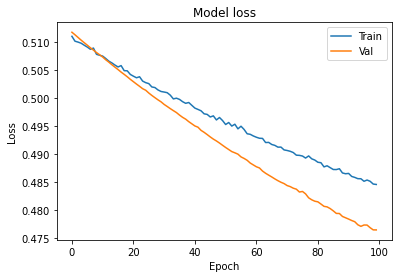

In [38]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

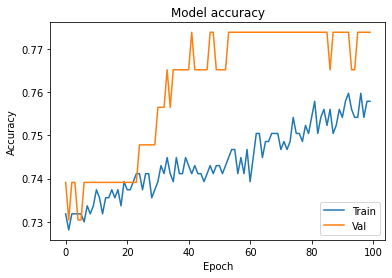

In [39]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [40]:
model_4 = Sequential([
    Dense(30, activation='relu', input_shape=(8,)),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [41]:
model_4.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_12 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_13 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


In [43]:
hist_4 = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 150us/step - loss: 0.4843 - accuracy: 0.7579 - val_loss: 0.4757 - val_accuracy: 0.7739
Epoch 2/100
537/537 [==============================] - 0s 55us/step - loss: 0.4841 - accuracy: 0.7598 - val_loss: 0.4753 - val_accuracy: 0.7739
Epoch 3/100
537/537 [==============================] - 0s 82us/step - loss: 0.4839 - accuracy: 0.7579 - val_loss: 0.4751 - val_accuracy: 0.7739
Epoch 4/100
537/537 [==============================] - 0s 63us/step - loss: 0.4837 - accuracy: 0.7579 - val_loss: 0.4748 - val_accuracy: 0.7739
Epoch 5/100
537/537 [==============================] - 0s 80us/step - loss: 0.4835 - accuracy: 0.7598 - val_loss: 0.4750 - val_accuracy: 0.7739
Epoch 6/100
537/537 [==============================] - 0s 92us/step - loss: 0.4841 - accuracy: 0.7561 - val_loss: 0.4744 - val_accuracy: 0.7739
Epoch 7/100
537/537 [==============================] - 0s 68us/step - loss: 0.4832 - accu

In [53]:
model_4.evaluate(X_test, Y_test)[1]

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

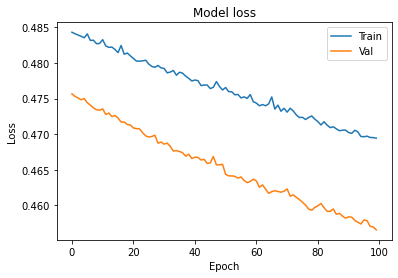

In [45]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

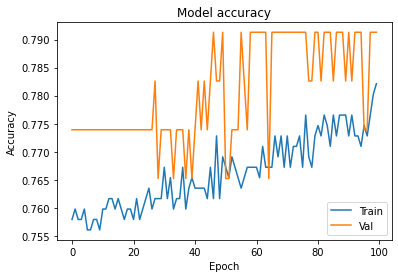

In [46]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [48]:
model_5 = Sequential([
    Dense(5, activation='relu', input_shape=(8,)),
    Dense(5, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [49]:
model_5.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [52]:
hist_5 = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 55us/step - loss: 0.4691 - accuracy: 0.7765 - val_loss: 0.4571 - val_accuracy: 0.7739
Epoch 2/100
537/537 [==============================] - 0s 69us/step - loss: 0.4690 - accuracy: 0.7747 - val_loss: 0.4572 - val_accuracy: 0.7739
Epoch 3/100
537/537 [==============================] - 0s 48us/step - loss: 0.4691 - accuracy: 0.7691 - val_loss: 0.4560 - val_accuracy: 0.7913
Epoch 4/100
537/537 [==============================] - 0s 61us/step - loss: 0.4685 - accuracy: 0.7784 - val_loss: 0.4562 - val_accuracy: 0.7739
Epoch 5/100
537/537 [==============================] - 0s 54us/step - loss: 0.4686 - accuracy: 0.7765 - val_loss: 0.4562 - val_accuracy: 0.7739
Epoch 6/100
537/537 [==============================] - 0s 68us/step - loss: 0.4691 - accuracy: 0.7784 - val_loss: 0.4570 - val_accuracy: 0.7739
Epoch 7/100
537/537 [==============================] - 0s 87us/step - loss: 0.4685 - accur

In [54]:
model_5.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 671us/step


0.4051724076271057

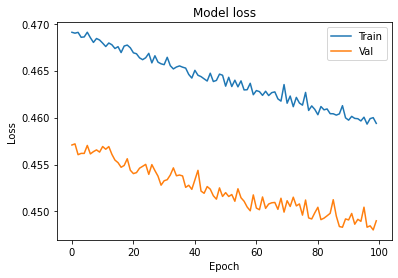

In [55]:
plt.plot(hist_5.history['loss'])
plt.plot(hist_5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

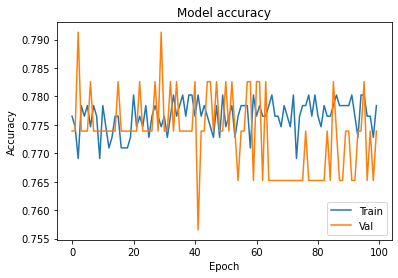

In [56]:
plt.plot(hist_5.history['accuracy'])
plt.plot(hist_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [57]:
model_6 = Sequential([
    Dense(50, activation='relu', input_shape=(8,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [58]:
model_6.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [59]:
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_24 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 51        
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [60]:
hist_6 = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 68us/step - loss: 0.4599 - accuracy: 0.7747 - val_loss: 0.4482 - val_accuracy: 0.7739
Epoch 2/100
537/537 [==============================] - 0s 59us/step - loss: 0.4591 - accuracy: 0.7747 - val_loss: 0.4489 - val_accuracy: 0.7739
Epoch 3/100
537/537 [==============================] - 0s 50us/step - loss: 0.4591 - accuracy: 0.7765 - val_loss: 0.4481 - val_accuracy: 0.7739
Epoch 4/100
537/537 [==============================] - 0s 58us/step - loss: 0.4591 - accuracy: 0.7747 - val_loss: 0.4473 - val_accuracy: 0.7652
Epoch 5/100
537/537 [==============================] - 0s 59us/step - loss: 0.4592 - accuracy: 0.7765 - val_loss: 0.4474 - val_accuracy: 0.7652
Epoch 6/100
537/537 [==============================] - 0s 57us/step - loss: 0.4586 - accuracy: 0.7803 - val_loss: 0.4483 - val_accuracy: 0.7739
Epoch 7/100
537/537 [==============================] - 0s 112us/step - loss: 0.4586 - accu

In [61]:
model_6.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 431us/step


0.5948275923728943

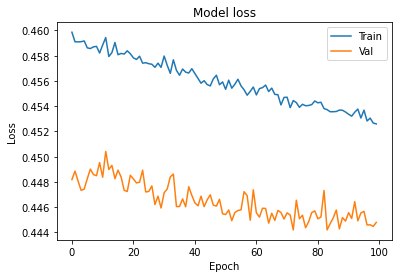

In [66]:
plt.plot(hist_6.history['loss'])
plt.plot(hist_6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

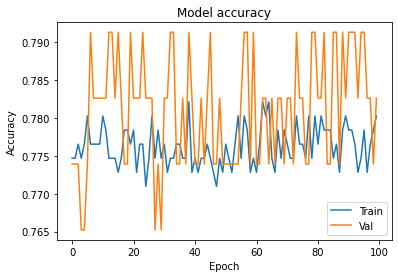

In [67]:
plt.plot(hist_6.history['accuracy'])
plt.plot(hist_6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [65]:
model_7 = Sequential([
    Dense(100, activation='relu', input_shape=(8,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [68]:
model_7.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
model_7.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_33 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
_________________________________________________________________


In [70]:
hist_7 = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 98us/step - loss: 0.4539 - accuracy: 0.7803 - val_loss: 0.4454 - val_accuracy: 0.7913
Epoch 2/100
537/537 [==============================] - 0s 73us/step - loss: 0.4540 - accuracy: 0.7784 - val_loss: 0.4438 - val_accuracy: 0.7739
Epoch 3/100
537/537 [==============================] - 0s 82us/step - loss: 0.4534 - accuracy: 0.7765 - val_loss: 0.4449 - val_accuracy: 0.7913
Epoch 4/100
537/537 [==============================] - 0s 261us/step - loss: 0.4536 - accuracy: 0.7784 - val_loss: 0.4457 - val_accuracy: 0.7913
Epoch 5/100
537/537 [==============================] - 0s 113us/step - loss: 0.4535 - accuracy: 0.7765 - val_loss: 0.4453 - val_accuracy: 0.7913
Epoch 6/100
537/537 [==============================] - 0s 118us/step - loss: 0.4525 - accuracy: 0.7765 - val_loss: 0.4452 - val_accuracy: 0.7913
Epoch 7/100
537/537 [==============================] - 0s 94us/step - loss: 0.4531 - ac

In [72]:
model_7.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 381us/step


0.38793104887008667

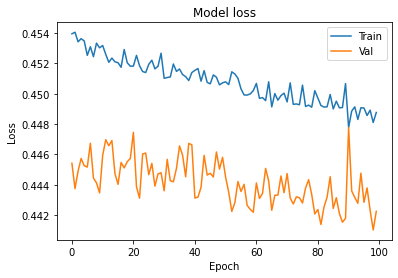

In [73]:
plt.plot(hist_7.history['loss'])
plt.plot(hist_7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

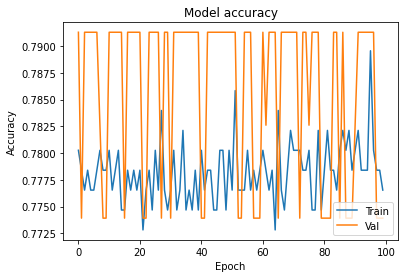

In [74]:
plt.plot(hist_7.history['accuracy'])
plt.plot(hist_7.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [75]:
model_8 = Sequential([
    Dense(10, activation='relu', input_shape=(8,)),
    Dense(8, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='softmax'),
])

In [77]:
model_8.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [79]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [80]:
hist_8 = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 91us/step - loss: 0.4482 - accuracy: 0.7803 - val_loss: 0.4411 - val_accuracy: 0.7739
Epoch 2/100
537/537 [==============================] - 0s 57us/step - loss: 0.4489 - accuracy: 0.7765 - val_loss: 0.4427 - val_accuracy: 0.7913
Epoch 3/100
537/537 [==============================] - 0s 89us/step - loss: 0.4483 - accuracy: 0.7784 - val_loss: 0.4449 - val_accuracy: 0.7913
Epoch 4/100
537/537 [==============================] - 0s 81us/step - loss: 0.4491 - accuracy: 0.7784 - val_loss: 0.4447 - val_accuracy: 0.7913
Epoch 5/100
537/537 [==============================] - 0s 114us/step - loss: 0.4481 - accuracy: 0.7840 - val_loss: 0.4429 - val_accuracy: 0.7913
Epoch 6/100
537/537 [==============================] - 0s 59us/step - loss: 0.4478 - accuracy: 0.7821 - val_loss: 0.4444 - val_accuracy: 0.7913
Epoch 7/100
537/537 [==============================] - 0s 81us/step - loss: 0.4484 - accu

In [84]:
model_8.evaluate(X_test, Y_test)[1]

InvalidArgumentError:  Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0
	 [[node loss_8/dense_38_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_68814]

Function call stack:
keras_scratch_graph


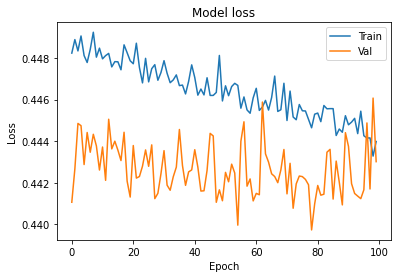

In [85]:
plt.plot(hist_8.history['loss'])
plt.plot(hist_8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

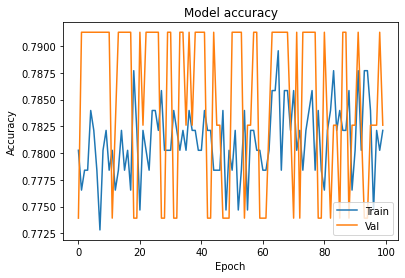

In [86]:
plt.plot(hist_8.history['accuracy'])
plt.plot(hist_8.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [89]:
# Preparing neural network parameters (weights and bias) using TensorFlow Variables  
weights = tf.Variable(initial_value=[[.615], [.8], [.59], [.55], [.47], [.7], [.61], [.7]], dtype=tf.float32)  
bias = tf.Variable(initial_value=[[1]], dtype=tf.float32)

In [90]:
model_9 = Sequential([
    Dense(10, activation='relu', input_shape=(8,)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [91]:
model_9.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [92]:
model_9.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [93]:
hist_9 = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 80us/step - loss: 0.4441 - accuracy: 0.7840 - val_loss: 0.4408 - val_accuracy: 0.7739
Epoch 2/100
537/537 [==============================] - 0s 49us/step - loss: 0.4448 - accuracy: 0.7803 - val_loss: 0.4426 - val_accuracy: 0.7913
Epoch 3/100
537/537 [==============================] - 0s 65us/step - loss: 0.4441 - accuracy: 0.7877 - val_loss: 0.4407 - val_accuracy: 0.7739
Epoch 4/100
537/537 [==============================] - 0s 89us/step - loss: 0.4438 - accuracy: 0.7821 - val_loss: 0.4420 - val_accuracy: 0.7826
Epoch 5/100
537/537 [==============================] - 0s 79us/step - loss: 0.4443 - accuracy: 0.7840 - val_loss: 0.4415 - val_accuracy: 0.7826
Epoch 6/100
537/537 [==============================] - 0s 81us/step - loss: 0.4437 - accuracy: 0.7858 - val_loss: 0.4421 - val_accuracy: 0.7913
Epoch 7/100
537/537 [==============================] - 0s 59us/step - loss: 0.4440 - accur

In [94]:
model_9.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 524us/step


0.6206896305084229

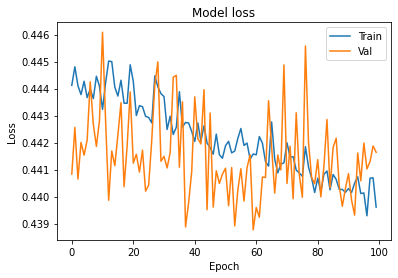

In [95]:
plt.plot(hist_9.history['loss'])
plt.plot(hist_9.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

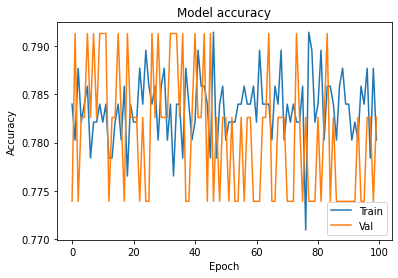

In [96]:
plt.plot(hist_9.history['accuracy'])
plt.plot(hist_9.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [97]:
model_10 = Sequential([
    Dense(12, activation='relu', input_shape=(8,)),
    Dense(10, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [98]:
model_10.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [99]:
model_10.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 9         
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [100]:
hist_10 = model.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 537 samples, validate on 115 samples
Epoch 1/100
537/537 [==============================] - 0s 95us/step - loss: 0.4402 - accuracy: 0.7896 - val_loss: 0.4389 - val_accuracy: 0.7826
Epoch 2/100
537/537 [==============================] - 0s 54us/step - loss: 0.4406 - accuracy: 0.7784 - val_loss: 0.4400 - val_accuracy: 0.7739
Epoch 3/100
537/537 [==============================] - 0s 99us/step - loss: 0.4391 - accuracy: 0.7821 - val_loss: 0.4411 - val_accuracy: 0.7826
Epoch 4/100
537/537 [==============================] - 0s 75us/step - loss: 0.4397 - accuracy: 0.7858 - val_loss: 0.4407 - val_accuracy: 0.7739
Epoch 5/100
537/537 [==============================] - 0s 75us/step - loss: 0.4390 - accuracy: 0.7840 - val_loss: 0.4427 - val_accuracy: 0.7739
Epoch 6/100
537/537 [==============================] - 0s 62us/step - loss: 0.4399 - accuracy: 0.7840 - val_loss: 0.4412 - val_accuracy: 0.7826
Epoch 7/100
537/537 [==============================] - 0s 60us/step - loss: 0.4406 - accur

In [101]:
model_10.evaluate(X_test, Y_test)[1]

116/116 [==============================] - 0s 579us/step


0.43103447556495667

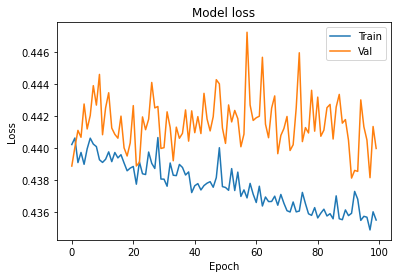

In [102]:
plt.plot(hist_10.history['loss'])
plt.plot(hist_10.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

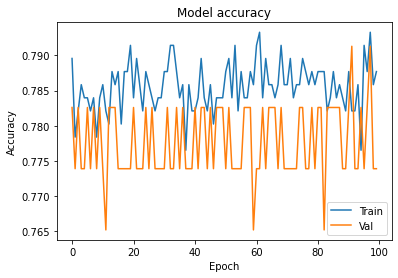

In [103]:
plt.plot(hist_10.history['accuracy'])
plt.plot(hist_10.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [104]:
df['# of Preg'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: # of Preg, dtype: float64

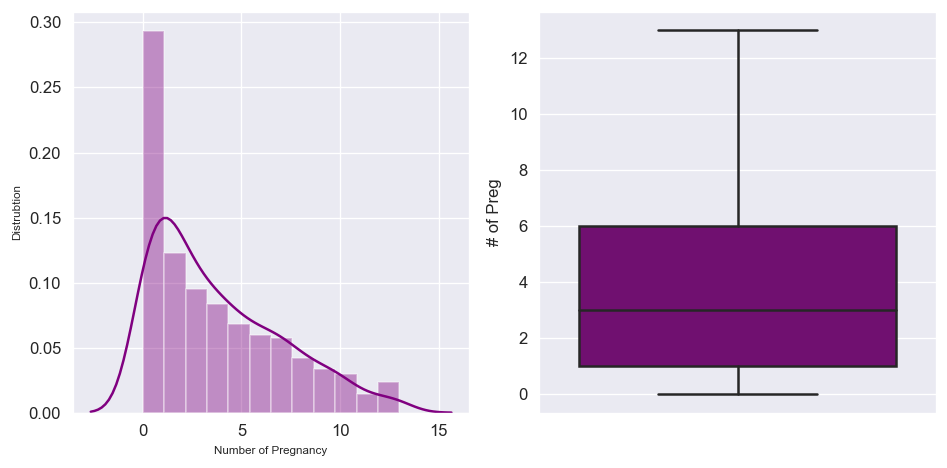

In [254]:
df = std_based('# of Preg',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['# of Preg'],ax=axes[0],color='purple')
axes[0].set_xlabel('Number of Pregnancy',fontdict={'fontsize':7})
axes[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('# of Preg',data=df,ax=axes[1],orient = 'v',color='purple')
plt.tight_layout()

In [106]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

In [108]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style('darkgrid')

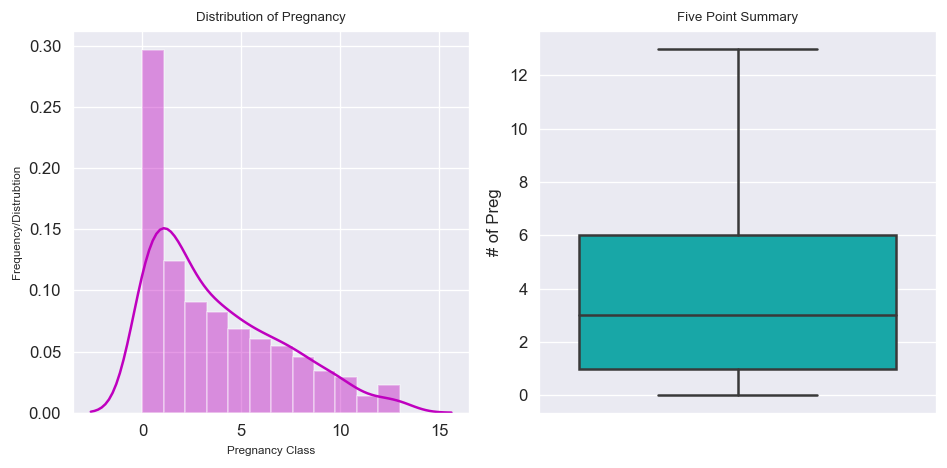

In [112]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['# of Preg'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('# of Preg',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [113]:
df['# of Preg'].describe()

count    764.000000
mean       3.786649
std        3.278714
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: # of Preg, dtype: float64

In [115]:
df['Plasma Glucose Conc.'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Plasma Glucose Conc., dtype: float64

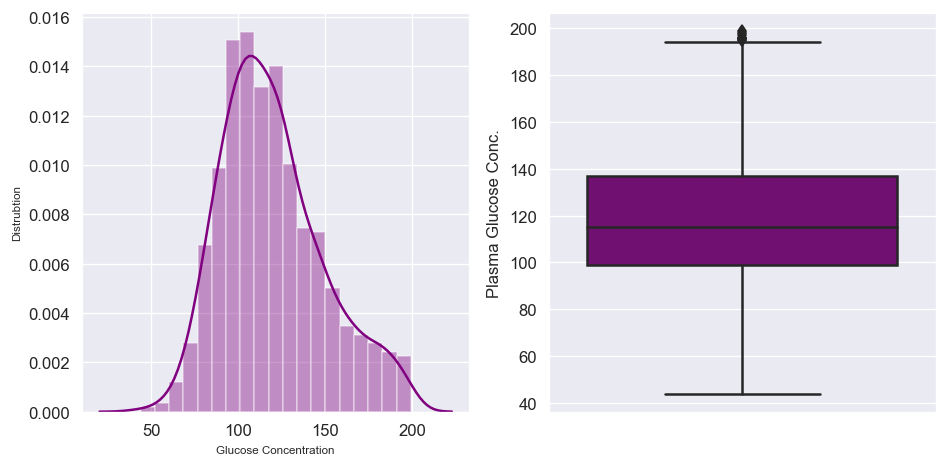

In [257]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Plasma Glucose Conc.'],ax=axes[0],color='purple')
axes[0].set_xlabel('Glucose Concentration',fontdict={'fontsize':7})
axes[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Plasma Glucose Conc.',data=df,ax=axes[1],orient = 'v',color='purple')
plt.tight_layout()

In [120]:
df['Plasma Glucose Conc.'] = df['Plasma Glucose Conc.'].replace(0,df['Plasma Glucose Conc.'].mean())
df.head()

# of Preg  Plasma Glucose Conc.  Diastolic BP  Triceps Skinfold Thickness  \
0          6                 148.0            72                          35   
1          1                  85.0            66                          29   
2          8                 183.0            64                           0   
3          1                  89.0            66                          23   
4          0                 137.0            40                          35   

   Serum Insulin 2hrs   BMI  Diabetes Pedigree Function  Age  Class  
0                   0  33.6                       0.627   50      1  
1                   0  26.6                       0.351   31      0  
2                   0  23.3                       0.672   32      1  
3                  94  28.1                       0.167   21      0  
4                 168  43.1                       2.288   33      1

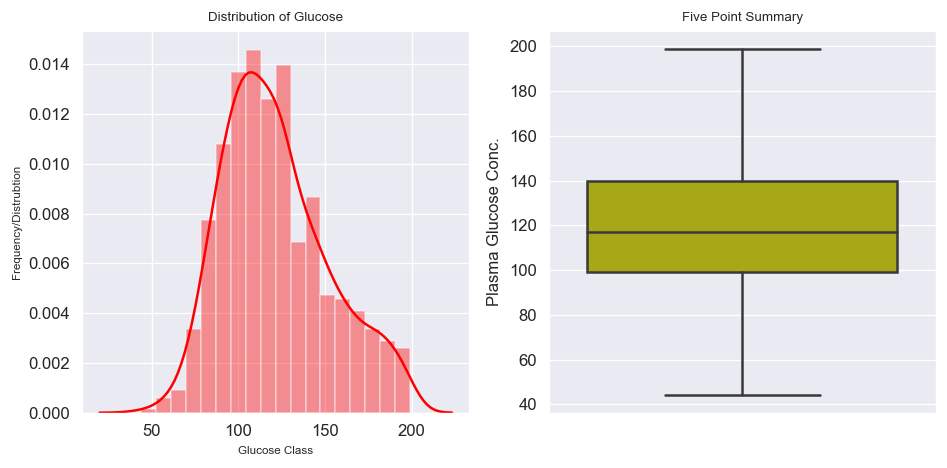

In [121]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Plasma Glucose Conc.'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Plasma Glucose Conc.',data=df,ax=axes[1],orient = 'v',color='y')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [125]:
df['Diastolic BP'].describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: Diastolic BP, dtype: float64

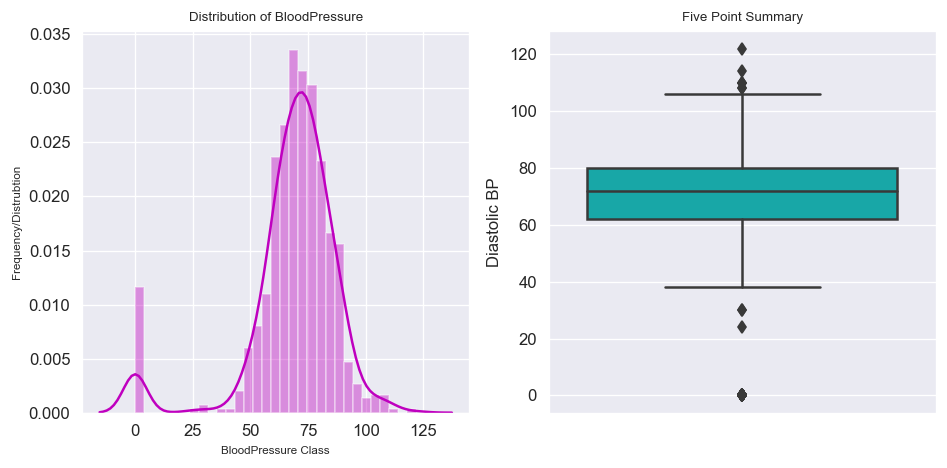

In [126]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Diastolic BP'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Diastolic BP',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [127]:
df['Diastolic BP'] = df['Diastolic BP'].replace(0,df['Diastolic BP'].median())
df.head()

# of Preg  Plasma Glucose Conc.  Diastolic BP  Triceps Skinfold Thickness  \
0          6                 148.0            72                          35   
1          1                  85.0            66                          29   
2          8                 183.0            64                           0   
3          1                  89.0            66                          23   
4          0                 137.0            40                          35   

   Serum Insulin 2hrs   BMI  Diabetes Pedigree Function  Age  Class  
0                   0  33.6                       0.627   50      1  
1                   0  26.6                       0.351   31      0  
2                   0  23.3                       0.672   32      1  
3                  94  28.1                       0.167   21      0  
4                 168  43.1                       2.288   33      1

In [128]:
df['Diastolic BP'].describe()

count    764.000000
mean      72.396597
std       12.120454
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: Diastolic BP, dtype: float64

In [129]:
df  = std_based('Diastolic BP',df)

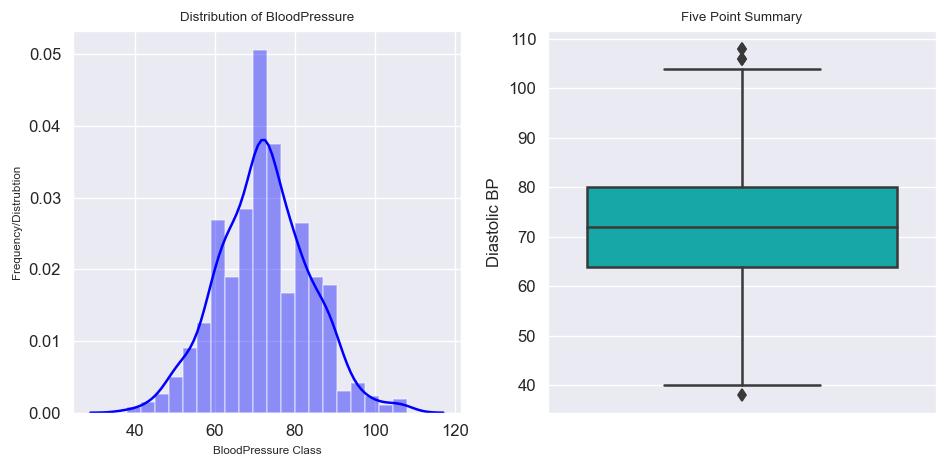

In [130]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Diastolic BP'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Diastolic BP',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [131]:
df['Triceps Skinfold Thickness'].describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: Triceps Skinfold Thickness, dtype: float64

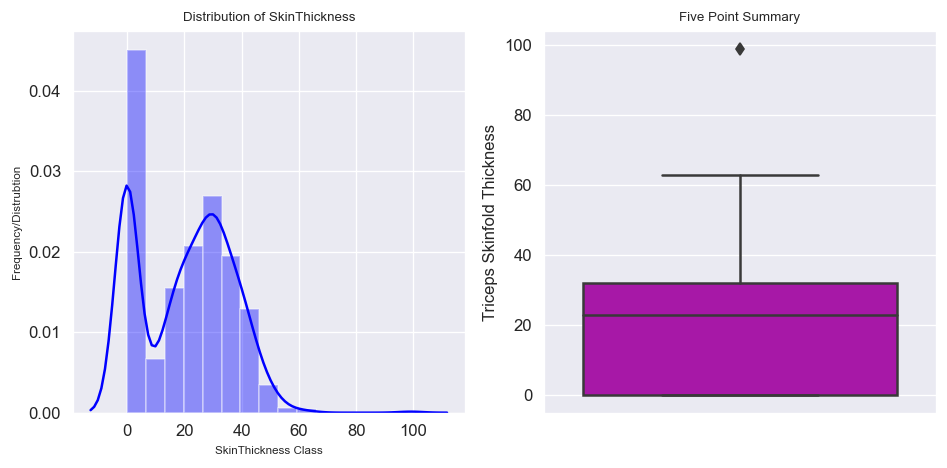

In [132]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Triceps Skinfold Thickness'],ax=axes[0],color='b')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Triceps Skinfold Thickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [133]:
df['Triceps Skinfold Thickness'] = df['Triceps Skinfold Thickness'].replace(0,df['Triceps Skinfold Thickness'].mean())
df.head()

# of Preg  Plasma Glucose Conc.  Diastolic BP  Triceps Skinfold Thickness  \
0          6                 148.0            72                   35.000000   
1          1                  85.0            66                   29.000000   
2          8                 183.0            64                   20.428571   
3          1                  89.0            66                   23.000000   
4          0                 137.0            40                   35.000000   

   Serum Insulin 2hrs   BMI  Diabetes Pedigree Function  Age  Class  
0                   0  33.6                       0.627   50      1  
1                   0  26.6                       0.351   31      0  
2                   0  23.3                       0.672   32      1  
3                  94  28.1                       0.167   21      0  
4                 168  43.1                       2.288   33      1

In [134]:
df = std_based("Triceps Skinfold Thickness",df)

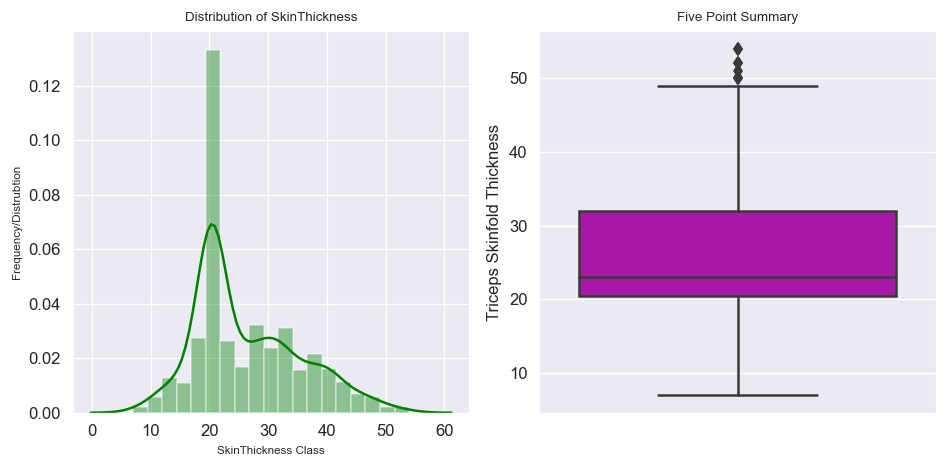

In [135]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Triceps Skinfold Thickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Triceps Skinfold Thickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [136]:
df['Serum Insulin 2hrs'].describe()

count    752.000000
mean      79.889628
std      115.995453
min        0.000000
25%        0.000000
50%       26.000000
75%      128.250000
max      846.000000
Name: Serum Insulin 2hrs, dtype: float64

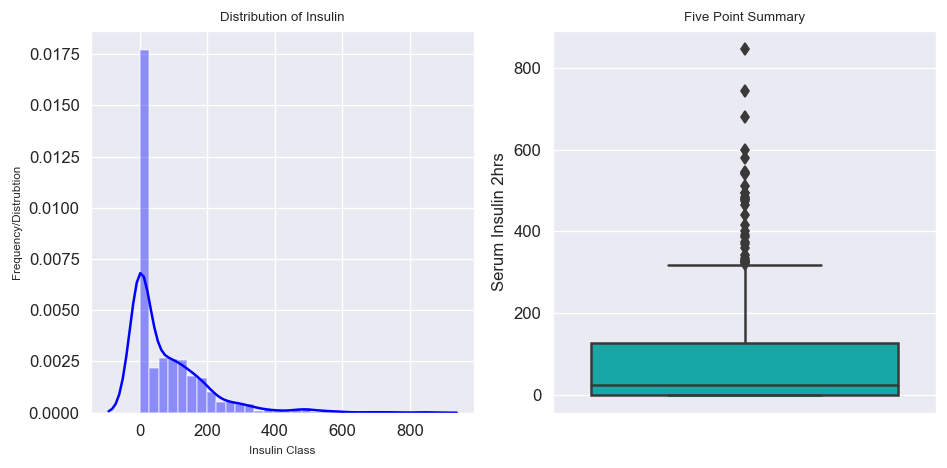

In [137]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Serum Insulin 2hrs'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Serum Insulin 2hrs',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [138]:
df['Serum Insulin 2hrs'] = df['Serum Insulin 2hrs'].replace(0,df['Serum Insulin 2hrs'].median())
df.head()

# of Preg  Plasma Glucose Conc.  Diastolic BP  Triceps Skinfold Thickness  \
0          6                 148.0            72                   35.000000   
1          1                  85.0            66                   29.000000   
2          8                 183.0            64                   20.428571   
3          1                  89.0            66                   23.000000   
4          0                 137.0            40                   35.000000   

   Serum Insulin 2hrs   BMI  Diabetes Pedigree Function  Age  Class  
0                  26  33.6                       0.627   50      1  
1                  26  26.6                       0.351   31      0  
2                  26  23.3                       0.672   32      1  
3                  94  28.1                       0.167   21      0  
4                 168  43.1                       2.288   33      1

In [139]:
df = std_based('Serum Insulin 2hrs',df)

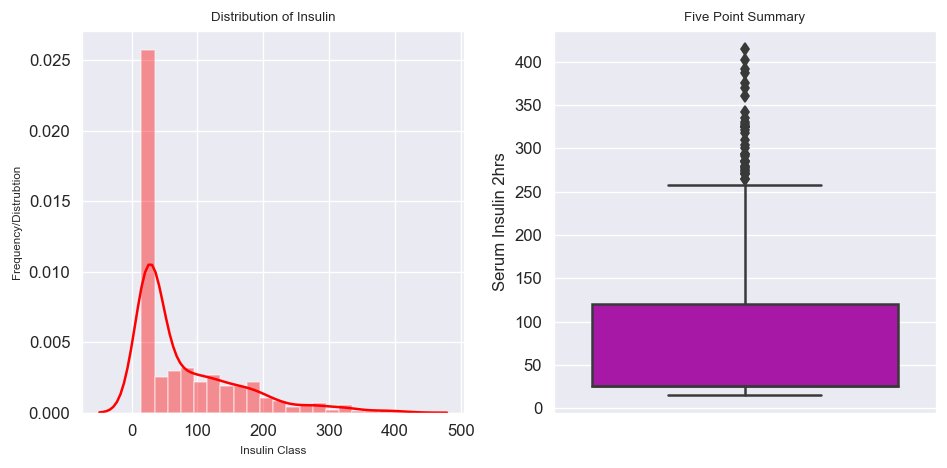

In [140]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Serum Insulin 2hrs'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Serum Insulin 2hrs',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [141]:
df.BMI.describe()

count    734.000000
mean      31.649728
std        7.630830
min        0.000000
25%       27.025000
50%       32.000000
75%       36.100000
max       57.300000
Name: BMI, dtype: float64

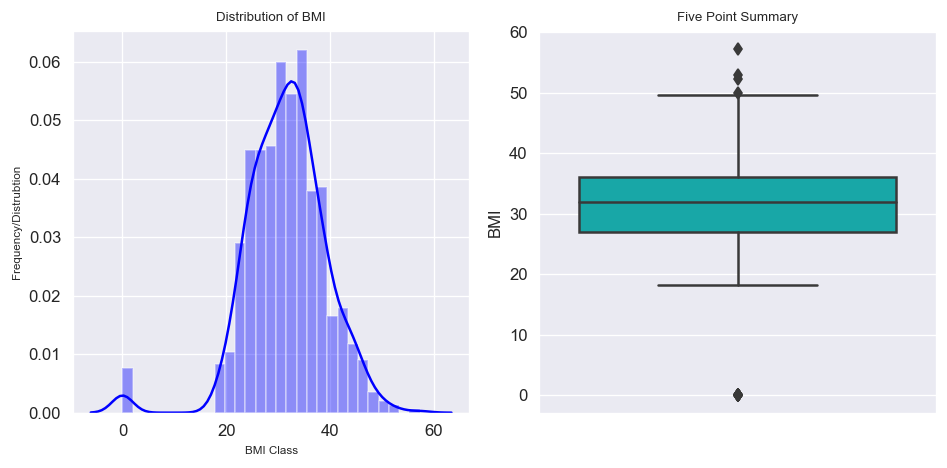

In [142]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [143]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

# of Preg  Plasma Glucose Conc.  Diastolic BP  Triceps Skinfold Thickness  \
0          6                 148.0            72                   35.000000   
1          1                  85.0            66                   29.000000   
2          8                 183.0            64                   20.428571   
3          1                  89.0            66                   23.000000   
4          0                 137.0            40                   35.000000   

   Serum Insulin 2hrs   BMI  Diabetes Pedigree Function  Age  Class  
0                  26  33.6                       0.627   50      1  
1                  26  26.6                       0.351   31      0  
2                  26  23.3                       0.672   32      1  
3                  94  28.1                       0.167   21      0  
4                 168  43.1                       2.288   33      1

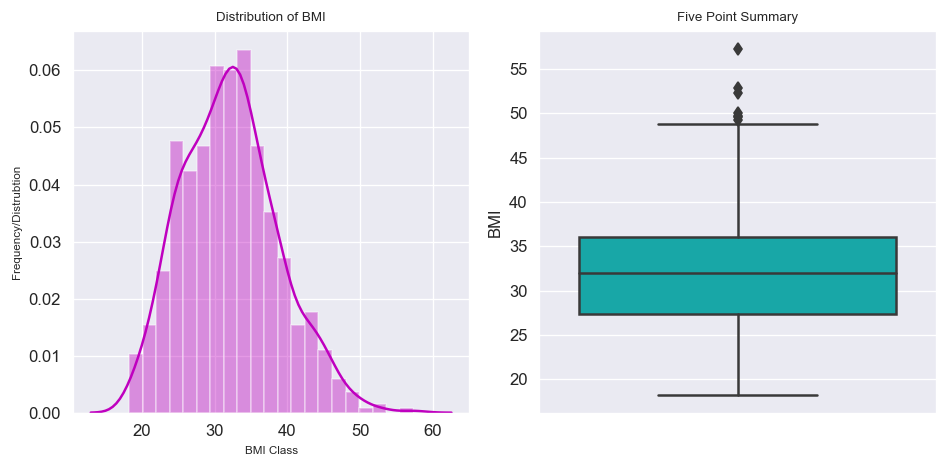

In [144]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [145]:
df['Diabetes Pedigree Function'].describe()

count    734.000000
mean       0.464274
std        0.313676
min        0.078000
25%        0.244000
50%        0.367000
75%        0.612750
max        2.288000
Name: Diabetes Pedigree Function, dtype: float64

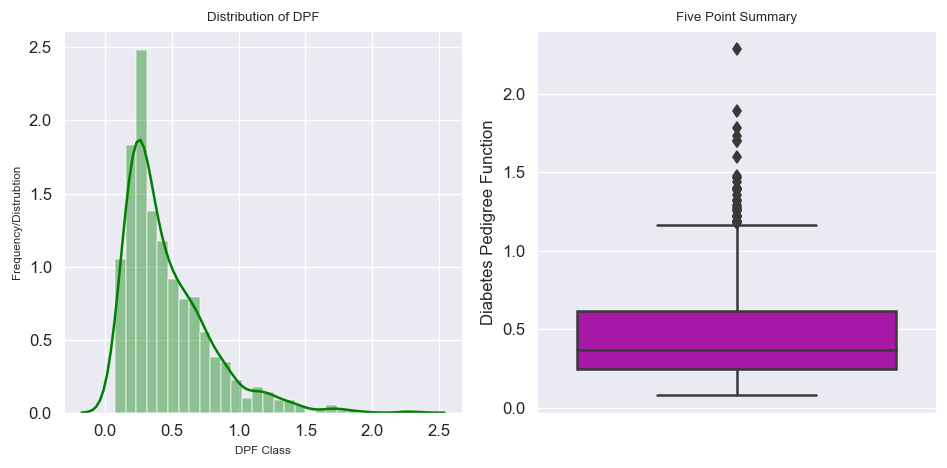

In [146]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Diabetes Pedigree Function'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Diabetes Pedigree Function',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

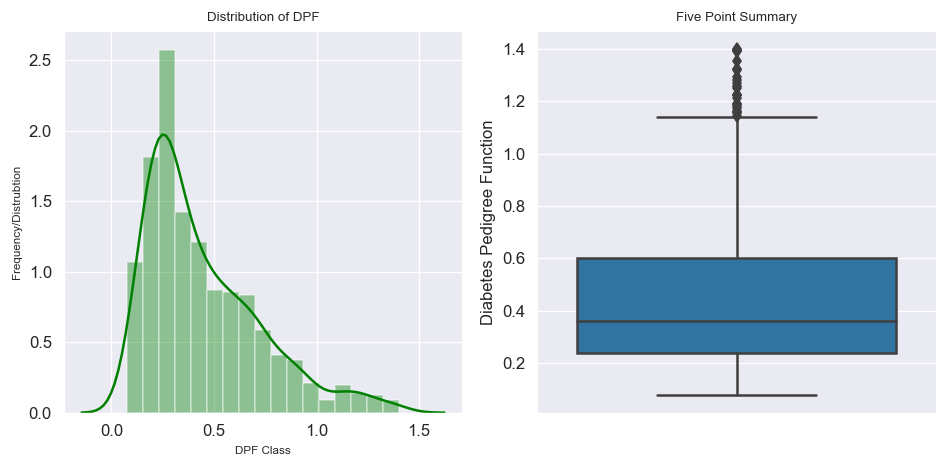

In [147]:
df = std_based('Diabetes Pedigree Function',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Diabetes Pedigree Function'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Diabetes Pedigree Function',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [148]:
df.Age.describe()

count    724.000000
mean      33.111878
std       11.711371
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

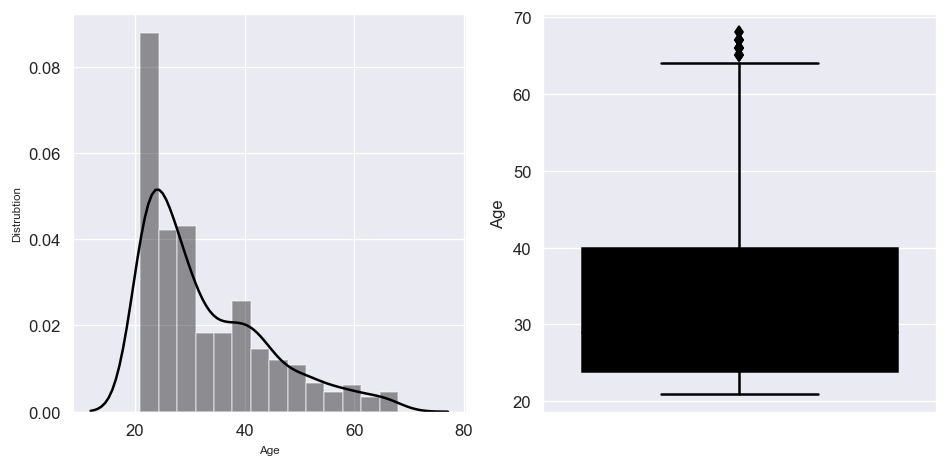

In [249]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='black')
axes[0].set_xlabel('Age',fontdict={'fontsize':7})
axes[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v', color='black')
plt.tight_layout()

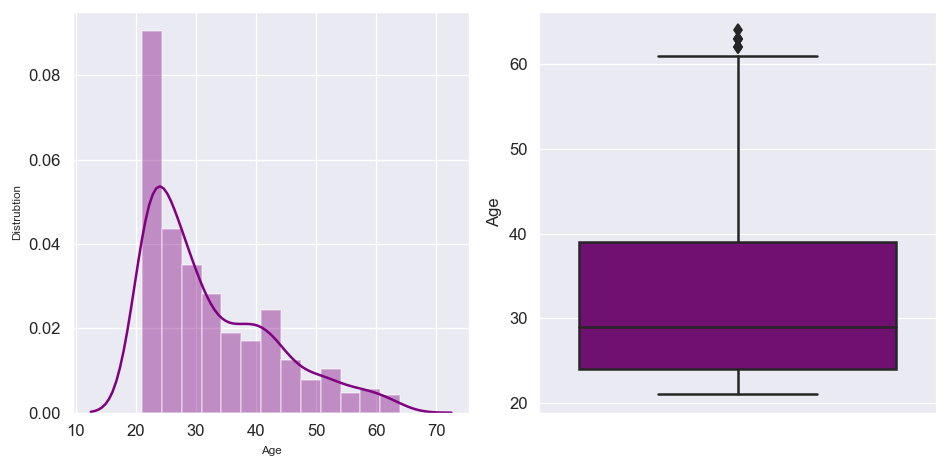

In [252]:
df = std_based('Age',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='purple')
axes[0].set_xlabel('Age',fontdict={'fontsize':7})
axes[0].set_ylabel('Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v', color='purple')
plt.tight_layout()

In [151]:
df.head()

# of Preg  Plasma Glucose Conc.  Diastolic BP  Triceps Skinfold Thickness  \
0          6                 148.0            72                   35.000000   
1          1                  85.0            66                   29.000000   
2          8                 183.0            64                   20.428571   
3          1                  89.0            66                   23.000000   
5          5                 116.0            74                   20.428571   

   Serum Insulin 2hrs   BMI  Diabetes Pedigree Function  Age  Class  
0                  26  33.6                       0.627   50      1  
1                  26  26.6                       0.351   31      0  
2                  26  23.3                       0.672   32      1  
3                  94  28.1                       0.167   21      0  
5                  26  25.6                       0.201   30      0

In [152]:
df.shape

(719, 9)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   # of Preg                   719 non-null    int64  
 1   Plasma Glucose Conc.        719 non-null    float64
 2   Diastolic BP                719 non-null    int64  
 3   Triceps Skinfold Thickness  719 non-null    float64
 4   Serum Insulin 2hrs          719 non-null    int64  
 5   BMI                         719 non-null    float64
 6   Diabetes Pedigree Function  719 non-null    float64
 7   Age                         719 non-null    int64  
 8   Class                       719 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 56.2 KB


In [154]:
df['Plasma Glucose Conc.'].describe()

count    719.000000
mean     119.946983
std       29.543108
min       44.000000
25%       99.000000
50%      115.000000
75%      137.500000
max      199.000000
Name: Plasma Glucose Conc., dtype: float64

In [155]:
df['Triceps Skinfold Thickness'].describe()

count    719.000000
mean      26.098550
std        8.993959
min        7.000000
25%       20.428571
50%       22.000000
75%       32.000000
max       54.000000
Name: Triceps Skinfold Thickness, dtype: float64

In [156]:
dataset = df.values

In [157]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [158]:
X = dataset[:,0:8]

In [159]:
Y = dataset[:,8]

In [160]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [161]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [162]:
X_scale

array([[0.46153846, 0.67096774, 0.48571429, ..., 0.39386189, 0.41527988,
        0.61702128],
       [0.07692308, 0.26451613, 0.4       , ..., 0.21483376, 0.2065053 ,
        0.21276596],
       [0.61538462, 0.89677419, 0.37142857, ..., 0.13043478, 0.44931921,
        0.23404255],
       ...,
       [0.38461538, 0.49677419, 0.48571429, ..., 0.20460358, 0.12632375,
        0.19148936],
       [0.07692308, 0.52903226, 0.31428571, ..., 0.30434783, 0.20499244,
        0.55319149],
       [0.07692308, 0.31612903, 0.45714286, ..., 0.31202046, 0.17927383,
        0.04255319]])

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [165]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [166]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(503, 8) (108, 8) (108, 8) (503,) (108,) (108,)


In [167]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

In [168]:
model_11 = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [169]:
model_11.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [170]:
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_48 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [171]:
hist_11 = model_11.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 503 samples, validate on 108 samples
Epoch 1/100
503/503 [==============================] - 0s 658us/step - loss: 0.6872 - accuracy: 0.6183 - val_loss: 0.6870 - val_accuracy: 0.5833
Epoch 2/100
503/503 [==============================] - 0s 57us/step - loss: 0.6814 - accuracy: 0.6620 - val_loss: 0.6848 - val_accuracy: 0.5833
Epoch 3/100
503/503 [==============================] - 0s 120us/step - loss: 0.6763 - accuracy: 0.6620 - val_loss: 0.6830 - val_accuracy: 0.5833
Epoch 4/100
503/503 [==============================] - 0s 65us/step - loss: 0.6710 - accuracy: 0.6640 - val_loss: 0.6821 - val_accuracy: 0.5833
Epoch 5/100
503/503 [==============================] - 0s 122us/step - loss: 0.6683 - accuracy: 0.6640 - val_loss: 0.6813 - val_accuracy: 0.5833
Epoch 6/100
503/503 [==============================] - 0s 80us/step - loss: 0.6644 - accuracy: 0.6640 - val_loss: 0.6808 - val_accuracy: 0.5833
Epoch 7/100
503/503 [==============================] - 0s 64us/step - loss: 0.6617 - ac

In [172]:
model_11.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 68us/step


0.7407407164573669

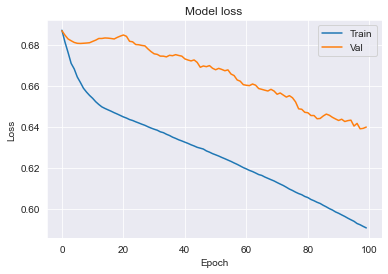

In [174]:
plt.plot(hist_11.history['loss'])
plt.plot(hist_11.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

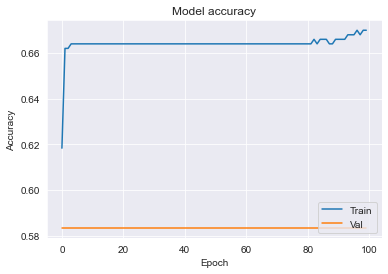

In [175]:
plt.plot(hist_11.history['accuracy'])
plt.plot(hist_11.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [176]:
model_12 = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [177]:
model_12.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [178]:
model_12.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [179]:
hist_12 = model_12.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 503 samples, validate on 108 samples
Epoch 1/100
503/503 [==============================] - 0s 828us/step - loss: 0.7049 - accuracy: 0.3400 - val_loss: 0.6975 - val_accuracy: 0.4259
Epoch 2/100
503/503 [==============================] - 0s 71us/step - loss: 0.6951 - accuracy: 0.4732 - val_loss: 0.6928 - val_accuracy: 0.5185
Epoch 3/100
503/503 [==============================] - 0s 83us/step - loss: 0.6861 - accuracy: 0.6521 - val_loss: 0.6901 - val_accuracy: 0.5833
Epoch 4/100
503/503 [==============================] - 0s 62us/step - loss: 0.6801 - accuracy: 0.6640 - val_loss: 0.6878 - val_accuracy: 0.5833
Epoch 5/100
503/503 [==============================] - 0s 162us/step - loss: 0.6741 - accuracy: 0.6640 - val_loss: 0.6868 - val_accuracy: 0.5833
Epoch 6/100
503/503 [==============================] - 0s 155us/step - loss: 0.6711 - accuracy: 0.6640 - val_loss: 0.6860 - val_accuracy: 0.5833
Epoch 7/100
503/503 [==============================] - 0s 119us/step - loss: 0.6687 - a

In [180]:
model_12.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 155us/step


0.7685185074806213

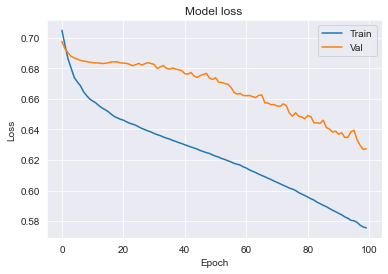

In [181]:
plt.plot(hist_12.history['loss'])
plt.plot(hist_12.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

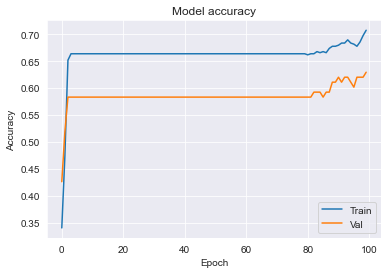

In [182]:
plt.plot(hist_12.history['accuracy'])
plt.plot(hist_12.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [183]:
model_13 = Sequential([
    Dense(15, activation='relu', input_shape=(8,)),
    Dense(15, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [184]:
model_13.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [185]:
model_13.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 15)                135       
_________________________________________________________________
dense_55 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_56 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 16        
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


In [186]:
hist_13 = model_13.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 503 samples, validate on 108 samples
Epoch 1/100
503/503 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.6640 - val_loss: 0.7276 - val_accuracy: 0.5833
Epoch 2/100
503/503 [==============================] - 0s 100us/step - loss: 0.6896 - accuracy: 0.6640 - val_loss: 0.7289 - val_accuracy: 0.5833
Epoch 3/100
503/503 [==============================] - 0s 209us/step - loss: 0.6876 - accuracy: 0.6640 - val_loss: 0.7296 - val_accuracy: 0.5833
Epoch 4/100
503/503 [==============================] - 0s 88us/step - loss: 0.6856 - accuracy: 0.6640 - val_loss: 0.7280 - val_accuracy: 0.5833
Epoch 5/100
503/503 [==============================] - 0s 79us/step - loss: 0.6837 - accuracy: 0.6640 - val_loss: 0.7256 - val_accuracy: 0.5833
Epoch 6/100
503/503 [==============================] - 0s 68us/step - loss: 0.6818 - accuracy: 0.6640 - val_loss: 0.7244 - val_accuracy: 0.5833
Epoch 7/100
503/503 [==============================] - 0s 82us/step - loss: 0.6802 - accu

In [187]:
model_13.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 135us/step


0.75

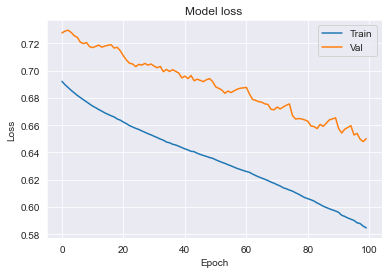

In [188]:
plt.plot(hist_13.history['loss'])
plt.plot(hist_13.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

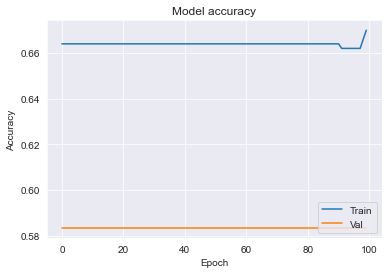

In [189]:
plt.plot(hist_13.history['accuracy'])
plt.plot(hist_13.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [190]:
model_14 = Sequential([
    Dense(50, activation='relu', input_shape=(8,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [191]:
model_14.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [192]:
hist_14 = model_14.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 503 samples, validate on 108 samples
Epoch 1/100
503/503 [==============================] - 0s 535us/step - loss: 0.6918 - accuracy: 0.5666 - val_loss: 0.6905 - val_accuracy: 0.5648
Epoch 2/100
503/503 [==============================] - 0s 68us/step - loss: 0.6867 - accuracy: 0.6342 - val_loss: 0.6885 - val_accuracy: 0.5648
Epoch 3/100
503/503 [==============================] - 0s 77us/step - loss: 0.6823 - accuracy: 0.6521 - val_loss: 0.6865 - val_accuracy: 0.5833
Epoch 4/100
503/503 [==============================] - 0s 73us/step - loss: 0.6773 - accuracy: 0.6620 - val_loss: 0.6849 - val_accuracy: 0.5833
Epoch 5/100
503/503 [==============================] - 0s 80us/step - loss: 0.6729 - accuracy: 0.6640 - val_loss: 0.6838 - val_accuracy: 0.5833
Epoch 6/100
503/503 [==============================] - 0s 77us/step - loss: 0.6692 - accuracy: 0.6640 - val_loss: 0.6829 - val_accuracy: 0.5833
Epoch 7/100
503/503 [==============================] - 0s 115us/step - loss: 0.6659 - acc

In [193]:
model_14.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 88us/step


0.7592592835426331

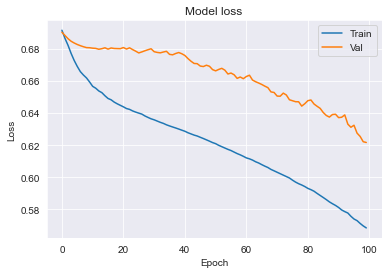

In [194]:
plt.plot(hist_14.history['loss'])
plt.plot(hist_14.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

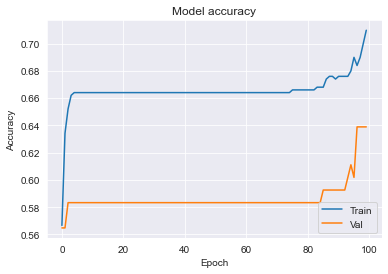

In [195]:
plt.plot(hist_14.history['accuracy'])
plt.plot(hist_14.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [196]:
model_15 = Sequential([
    Dense(3, activation='relu', input_shape=(8,)),
    Dense(1, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [197]:
model_15.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [198]:
hist_15 = model_15.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 503 samples, validate on 108 samples
Epoch 1/100
503/503 [==============================] - 0s 644us/step - loss: 0.6587 - accuracy: 0.6640 - val_loss: 0.7057 - val_accuracy: 0.5833
Epoch 2/100
503/503 [==============================] - 0s 64us/step - loss: 0.6582 - accuracy: 0.6640 - val_loss: 0.7058 - val_accuracy: 0.5833
Epoch 3/100
503/503 [==============================] - 0s 45us/step - loss: 0.6572 - accuracy: 0.6640 - val_loss: 0.7060 - val_accuracy: 0.5833
Epoch 4/100
503/503 [==============================] - 0s 55us/step - loss: 0.6563 - accuracy: 0.6640 - val_loss: 0.7070 - val_accuracy: 0.5833
Epoch 5/100
503/503 [==============================] - 0s 175us/step - loss: 0.6554 - accuracy: 0.6640 - val_loss: 0.7078 - val_accuracy: 0.5833
Epoch 6/100
503/503 [==============================] - 0s 67us/step - loss: 0.6545 - accuracy: 0.6640 - val_loss: 0.7063 - val_accuracy: 0.5833
Epoch 7/100
503/503 [==============================] - 0s 172us/step - loss: 0.6541 - ac

In [199]:
model_15.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 113us/step


0.7407407164573669

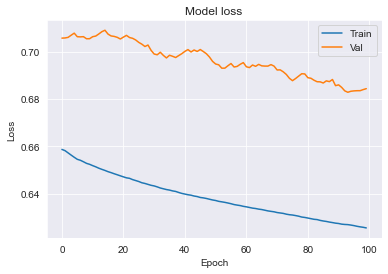

In [200]:
plt.plot(hist_15.history['loss'])
plt.plot(hist_15.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

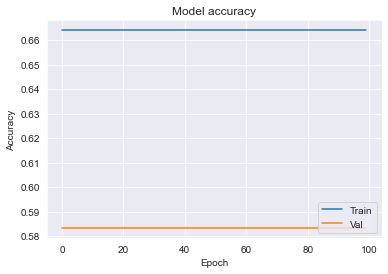

In [201]:
plt.plot(hist_15.history['accuracy'])
plt.plot(hist_15.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [210]:
# Preparing neural network parameters (weights and bias) using TensorFlow Variables  
weights = tf.Variable(initial_value=[[.615], [.8], [.59], [.55], [.47], [.7], [.61], [.7]], dtype=tf.float32)  
bias = tf.Variable(initial_value=[[1]], dtype=tf.float32)

In [211]:
from tensorflow.keras import layers

In [212]:
model_16 = Sequential([
    Dense(25, activation='relu', input_shape=(8,)),
    Dense(25, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [213]:
model_16.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [214]:
model_16.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 25)                225       
_________________________________________________________________
dense_73 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_74 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 26        
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [215]:
hist_16 = model_16.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 503 samples, validate on 108 samples
Epoch 1/100
503/503 [==============================] - 0s 542us/step - loss: 0.6972 - accuracy: 0.3738 - val_loss: 0.6922 - val_accuracy: 0.5926
Epoch 2/100
503/503 [==============================] - 0s 79us/step - loss: 0.6882 - accuracy: 0.6083 - val_loss: 0.6885 - val_accuracy: 0.5926
Epoch 3/100
503/503 [==============================] - 0s 71us/step - loss: 0.6809 - accuracy: 0.6779 - val_loss: 0.6860 - val_accuracy: 0.5648
Epoch 4/100
503/503 [==============================] - 0s 75us/step - loss: 0.6755 - accuracy: 0.6640 - val_loss: 0.6836 - val_accuracy: 0.5833
Epoch 5/100
503/503 [==============================] - 0s 69us/step - loss: 0.6698 - accuracy: 0.6640 - val_loss: 0.6818 - val_accuracy: 0.5833
Epoch 6/100
503/503 [==============================] - 0s 82us/step - loss: 0.6649 - accuracy: 0.6640 - val_loss: 0.6802 - val_accuracy: 0.5833
Epoch 7/100
503/503 [==============================] - 0s 59us/step - loss: 0.6604 - accu

In [216]:
model_16.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 263us/step


0.7407407164573669

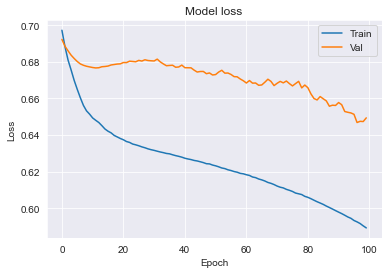

In [217]:
plt.plot(hist_16.history['loss'])
plt.plot(hist_16.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

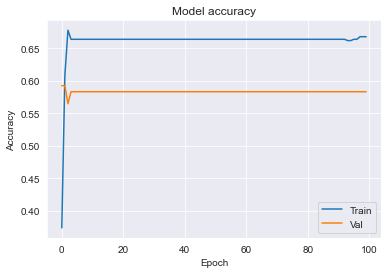

In [218]:
plt.plot(hist_16.history['accuracy'])
plt.plot(hist_16.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [219]:
model_17 = Sequential([
    Dense(30, activation='relu', input_shape=(8,)),
    Dense(25, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [220]:
model_17.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [221]:
model_17.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_77 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_78 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 21        
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


In [222]:
hist_17 = model_17.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 503 samples, validate on 108 samples
Epoch 1/100
503/503 [==============================] - 0s 596us/step - loss: 0.7011 - accuracy: 0.3559 - val_loss: 0.6913 - val_accuracy: 0.4722
Epoch 2/100
503/503 [==============================] - 0s 80us/step - loss: 0.6954 - accuracy: 0.4195 - val_loss: 0.6883 - val_accuracy: 0.5926
Epoch 3/100
503/503 [==============================] - 0s 62us/step - loss: 0.6897 - accuracy: 0.6044 - val_loss: 0.6859 - val_accuracy: 0.6481
Epoch 4/100
503/503 [==============================] - 0s 49us/step - loss: 0.6846 - accuracy: 0.7018 - val_loss: 0.6836 - val_accuracy: 0.6389
Epoch 5/100
503/503 [==============================] - 0s 63us/step - loss: 0.6796 - accuracy: 0.6799 - val_loss: 0.6818 - val_accuracy: 0.5833
Epoch 6/100
150/503 [=======>......................] - ETA: 0s - loss: 0.6770 - accuracy: 0.68503/503 [==============================] - 0s 244us/step - loss: 0.6758 - accuracy: 0.6660 - val_loss: 0.6800 - val_accuracy: 0.5833
Epoch 

In [223]:
model_17.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 115us/step


0.8055555820465088

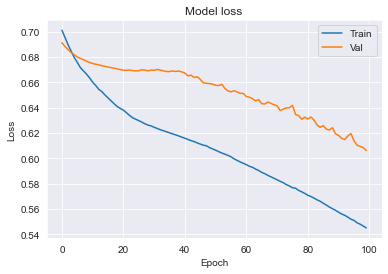

In [224]:
plt.plot(hist_17.history['loss'])
plt.plot(hist_17.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

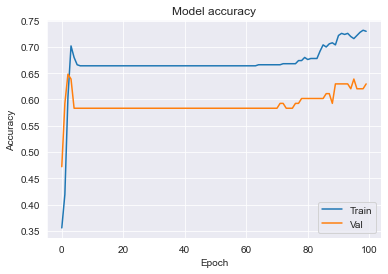

In [225]:
plt.plot(hist_17.history['accuracy'])
plt.plot(hist_17.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [226]:
model_18 = Sequential([
    Dense(30, activation='relu', input_shape=(8,)),
    Dense(20, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [227]:
model_18.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [228]:
model_18.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_81 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_82 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 16        
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [229]:
hist_18 = model_18.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Train on 503 samples, validate on 108 samples
Epoch 1/100
503/503 [==============================] - 0s 954us/step - loss: 0.6924 - accuracy: 0.5388 - val_loss: 0.6877 - val_accuracy: 0.5556
Epoch 2/100
503/503 [==============================] - 0s 91us/step - loss: 0.6841 - accuracy: 0.6421 - val_loss: 0.6858 - val_accuracy: 0.6389
Epoch 3/100
503/503 [==============================] - 0s 79us/step - loss: 0.6792 - accuracy: 0.6620 - val_loss: 0.6842 - val_accuracy: 0.5833
Epoch 4/100
503/503 [==============================] - 0s 75us/step - loss: 0.6739 - accuracy: 0.6660 - val_loss: 0.6831 - val_accuracy: 0.5833
Epoch 5/100
503/503 [==============================] - 0s 52us/step - loss: 0.6705 - accuracy: 0.6640 - val_loss: 0.6823 - val_accuracy: 0.5833
Epoch 6/100
503/503 [==============================] - 0s 217us/step - loss: 0.6669 - accuracy: 0.6640 - val_loss: 0.6820 - val_accuracy: 0.5833
Epoch 7/100
503/503 [==============================] - 0s 126us/step - loss: 0.6637 - ac

In [230]:
model_18.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 76us/step


0.8148148059844971

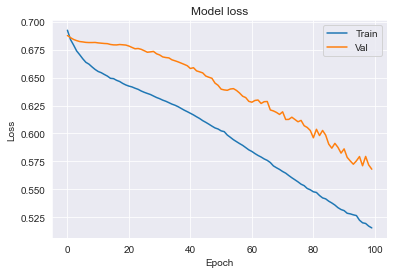

In [231]:
plt.plot(hist_18.history['loss'])
plt.plot(hist_18.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

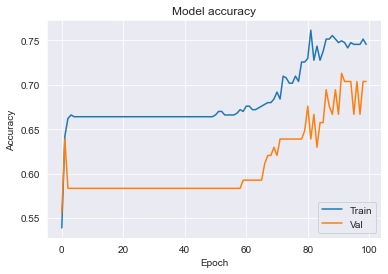

In [232]:
plt.plot(hist_18.history['accuracy'])
plt.plot(hist_18.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [233]:
model_19 = Sequential([
    Dense(35, activation='relu', input_shape=(8,)),
    Dense(25, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [234]:
model_19.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [235]:
model_19.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 35)                315       
_________________________________________________________________
dense_85 (Dense)             (None, 25)                900       
_________________________________________________________________
dense_86 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 11        
Total params: 1,486
Trainable params: 1,486
Non-trainable params: 0
_________________________________________________________________


In [236]:
hist_19 = model_19.fit(X_train, Y_train,
          batch_size=50, epochs=200,
          validation_data=(X_val, Y_val))

h 64/200
503/503 [==============================] - 0s 85us/step - loss: 0.5431 - accuracy: 0.7177 - val_loss: 0.6008 - val_accuracy: 0.6667
Epoch 65/200
503/503 [==============================] - 0s 82us/step - loss: 0.5416 - accuracy: 0.7356 - val_loss: 0.6017 - val_accuracy: 0.6574
Epoch 66/200
503/503 [==============================] - 0s 71us/step - loss: 0.5395 - accuracy: 0.7256 - val_loss: 0.5998 - val_accuracy: 0.6667
Epoch 67/200
503/503 [==============================] - 0s 190us/step - loss: 0.5379 - accuracy: 0.7316 - val_loss: 0.5983 - val_accuracy: 0.6667
Epoch 68/200
503/503 [==============================] - 0s 113us/step - loss: 0.5361 - accuracy: 0.7336 - val_loss: 0.6022 - val_accuracy: 0.6574
Epoch 69/200
503/503 [==============================] - 0s 91us/step - loss: 0.5347 - accuracy: 0.7296 - val_loss: 0.6050 - val_accuracy: 0.6574
Epoch 70/200
503/503 [==============================] - 0s 79us/step - loss: 0.5339 - accuracy: 0.7256 - val_loss: 0.6014 - val_accu

In [237]:
model_19.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 62us/step


0.7962962985038757

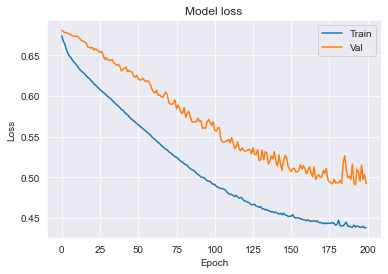

In [238]:
plt.plot(hist_19.history['loss'])
plt.plot(hist_19.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

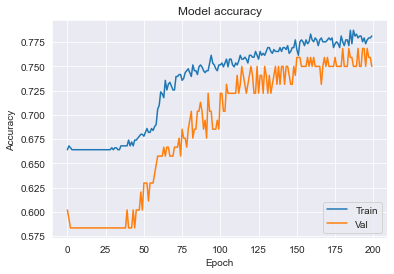

In [239]:
plt.plot(hist_19.history['accuracy'])
plt.plot(hist_19.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [240]:
model_20 = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(30, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [241]:
model_20.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [242]:
model_20.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_89 (Dense)             (None, 30)                990       
_________________________________________________________________
dense_90 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 26        
Total params: 2,079
Trainable params: 2,079
Non-trainable params: 0
_________________________________________________________________


In [243]:
hist_20 = model_20.fit(X_train, Y_train,
          batch_size=50, epochs=200,
          validation_data=(X_val, Y_val))

 64/200
503/503 [==============================] - 0s 85us/step - loss: 0.6167 - accuracy: 0.6640 - val_loss: 0.6649 - val_accuracy: 0.5833
Epoch 65/200
503/503 [==============================] - 0s 70us/step - loss: 0.6162 - accuracy: 0.6640 - val_loss: 0.6660 - val_accuracy: 0.5833
Epoch 66/200
503/503 [==============================] - 0s 149us/step - loss: 0.6154 - accuracy: 0.6640 - val_loss: 0.6666 - val_accuracy: 0.5833
Epoch 67/200
503/503 [==============================] - 0s 92us/step - loss: 0.6148 - accuracy: 0.6640 - val_loss: 0.6657 - val_accuracy: 0.5833
Epoch 68/200
503/503 [==============================] - 0s 99us/step - loss: 0.6140 - accuracy: 0.6640 - val_loss: 0.6653 - val_accuracy: 0.5833
Epoch 69/200
503/503 [==============================] - 0s 106us/step - loss: 0.6135 - accuracy: 0.6640 - val_loss: 0.6632 - val_accuracy: 0.5833
Epoch 70/200
503/503 [==============================] - 0s 72us/step - loss: 0.6126 - accuracy: 0.6640 - val_loss: 0.6639 - val_accur

In [244]:
model_20.evaluate(X_test, Y_test)[1]

108/108 [==============================] - 0s 139us/step


0.7685185074806213

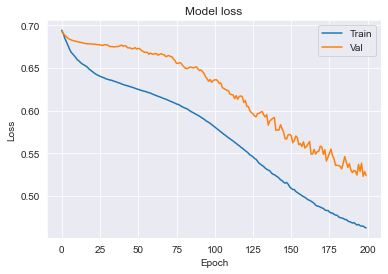

In [245]:
plt.plot(hist_20.history['loss'])
plt.plot(hist_20.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

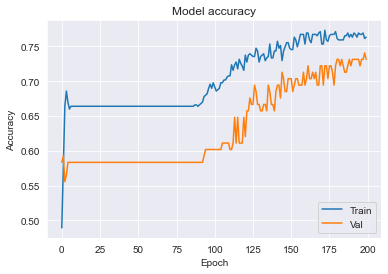

In [246]:
plt.plot(hist_20.history['accuracy'])
plt.plot(hist_20.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [260]:
df.describe()

# of Preg  Plasma Glucose Conc.  Diastolic BP  \
count  768.000000            768.000000    768.000000   
mean     3.845052            120.894531     69.105469   
std      3.369578             31.972618     19.355807   
min      0.000000              0.000000      0.000000   
25%      1.000000             99.000000     62.000000   
50%      3.000000            117.000000     72.000000   
75%      6.000000            140.250000     80.000000   
max     17.000000            199.000000    122.000000   

       Triceps Skinfold Thickness  Serum Insulin 2hrs         BMI  \
count                  768.000000          768.000000  768.000000   
mean                    20.536458           79.799479   31.992578   
std                     15.952218          115.244002    7.884160   
min                      0.000000            0.000000    0.000000   
25%                      0.000000            0.000000   27.300000   
50%                     23.000000           30.500000   32.000000   
75%                     32.000000          127.250000   36.600000   
max                     99.000000          846.000000   67.100000   

       Diabetes Pedigree Function         Age       Class  
count                  768.000000  768.000000  768.000000  
mean                     0.471876   33.240885    0.348958  
std                      0.331329   11.760232    0.476951  
min                      0.078000   21.000000    0.000000  
25%                      0.243750   24.000000    0.000000  
50%                      0.372500   29.000000    0.000000  
75%                      0.626250   41.000000    1.000000  
max                      2.420000   81.000000    1.000000